In [4]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
API_KEY = ''
ENDPOINT = ''
img = './koishizu001.jpg'

In [6]:
headers = {
    # Request headers
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': API_KEY,
}

params = urllib.parse.urlencode({
    # Request parameters
    'detectionModel':'detection_01',
    'returnFaceAttributes': 'age,gender'
})

[{'faceId': '5d2bc1ac-6588-4b07-ba45-21e5205065b7', 'faceRectangle': {'top': 440, 'left': 1000, 'width': 784, 'height': 784}, 'faceAttributes': {'gender': 'male', 'age': 28.0}}]


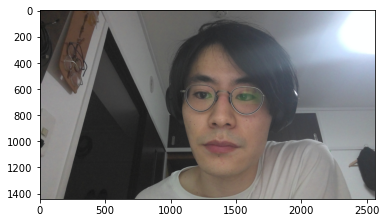

In [7]:
conn = http.client.HTTPSConnection(ENDPOINT)
conn.request("POST", "/face/v1.0/detect?%s" % params, open(img,"rb"), headers)
response = conn.getresponse()
res_data = response.read()
data = json.loads(res_data)
print(data)
pic = cv2.imread(img)
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(pic)
conn.close()

In [10]:
def display_expression(data,img):
    font = cv2.FONT_HERSHEY_PLAIN
    font_size = 4

    data = json.loads(data)
    for face in data:
        f_rec  =  face['faceRectangle']
        width  =  f_rec['width']
        height =  f_rec['height']
        left   =  f_rec['left']
        top    =  f_rec['top']
        cv2.rectangle(img,(left,top),(left+width,top+height),(0,200,0),font_size)

        f_attr = face['faceAttributes']
        gender = f_attr['gender']
        age = f_attr['age']
        cv2.putText(img, gender, (left, 30+top+height), font, font_size, (0, 200, 0), 2)
        cv2.putText(img, str(age), (left, 60+top+height), font, font_size, (0, 200, 0), 2)

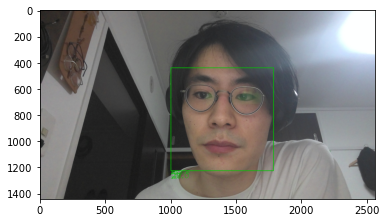

In [11]:
display_expression(res_data,pic)
plt.imshow(pic)